<a href="https://colab.research.google.com/github/gitmystuff/DTSC4050/blob/main/Week_06-Hypothesis_Testing/Week_06_Hypothesis_Testing_and_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 06 - Hypothesis Testing and ANOVA

## Getting Started

* Colab - get notebook from gitmystuff DTSC4050 repository
* Save a Copy in Drive
* Remove Copy of
* Edit name
* Take attendance
* Clean up Colab Notebooks folder
* Submit shared link

### Hottest Skills

In 2025, the "hottest" skills in demand span both technical and soft skills, with a strong focus on areas like AI, data analytics, cybersecurity, and cloud computing, alongside essential soft skills like communication, adaptability, and problem-solving.   

### Good Reads

* The Art of Statistics: https://library.villanova.edu/Find/Record/2202957/TOC
* Naked Statistics: https://library.villanova.edu/Find/Record/1435082/TOC
* The Book of Why: https://en.m.wikipedia.org/wiki/The_Book_of_Why
* https://www.sciencedirect.com/science/article/pii/S0092867408009537
* https://www.elderresearch.com/blog/who-invented-the-null-hypothesis/
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2816758/

### Introduction

**Example 1: The "TikTok Ban"**

* **Scenario:** Imagine a news headline proclaims, "70% of Americans Support Banning TikTok!" This is based on a poll of 1,000 people.
* **Discussion Points:**
    * **Sample vs. Population:** Does this poll of 1,000 truly represent the opinions of all 330+ million Americans?  Why or why not?
    * **Margin of Error:**  The poll might have a margin of error of +/- 3%.  What does this actually mean? (True support could be anywhere from 67% to 73%.)
    * **Sampling Bias:**  How were those 1,000 people selected? Were they all TikTok users?  All older adults?  How might the way the sample was chosen affect the results?
    * **Real-World Impact:**  Should the government base a decision to ban TikTok solely on this poll? What other factors should they consider?

**Example 2:  The "Vegan Burger"**

* **Scenario:** A college campus dining hall wants to know if students would like a new vegan burger on the menu. They conduct a poll during lunchtime in the main cafeteria.
* **Discussion Points:**
    * **Representative Sample:**  Does this poll capture the preferences of *all* students? What about those who eat at different times or in other dining locations?
    * **Question Wording:** How might the way the poll question is phrased influence responses? (E.g., "Would you like a delicious, healthy vegan burger option?" vs. "Should we replace a meat option with a vegan burger?")
    * **Extrapolating Results:** If 60% of the polled students say "yes" to the vegan burger, can the dining hall confidently assume 60% of the entire student body wants it?

**Example 3: The "Climate Change Concern"**

* **Scenario:** A survey finds that 80% of people in a coastal town are "very concerned" about climate change.
* **Discussion Points:**
    * **Location Bias:**  Might people living in a coastal area, more directly affected by rising sea levels, have different views than those living inland?
    * **Comparing Polls:** How might the results differ if the same survey was conducted in a different location (e.g., a farming community, a large city)?
    * **Actionable Insights:**  How could this poll be used to inform local policy decisions or community initiatives related to climate change?

**Do a Poll**

* Favorite Social Media
* Understanding of Distributions



In [ ]:
# some practice
# Calculate the mean of a list of numbers
np.mean()

# Calculate the standard deviation of a list of numbers
np.std()

# Generate a random sample from a normal distribution
np.random.normal(loc=0, scale=1, size=10)

In [ ]:
import numpy as np
import random
from scipy import stats

num_rolls = 20
die_rolls = [random.randint(1, 6) for _ in range(num_rolls)]

t_stat, p_value = stats.ttest_1samp(die_rolls, 3.5)  # 3.5 is the expected average for a fair die

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.3f}")
alpha = 0.05

# Compare p-value to alpha and make a decision
if p_value < alpha:
    print("Reject the null hypothesis - Evidence suggests the die is not fair.")
else:
    print("Fail to reject the null hypothesis - No strong evidence the die is unfair.")

print()
df = 19
critical_t = stats.t.ppf(1 - alpha/2, df)
print(f"Critical t-value (think abs value)): {critical_t:.2f}")

if abs(t_stat) > critical_t:
    print("Reject the null hypothesis - Evidence suggests the die is not fair.")
else:
    print("Fail to reject the null hypothesis - No strong evidence the die is unfair.")

T-statistic: 0.61
P-value: 0.546
Fail to reject the null hypothesis - No strong evidence the die is unfair.

Critical t-value (think abs value)): 2.09
Fail to reject the null hypothesis - No strong evidence the die is unfair.


Degrees of freedom (df) are a crucial concept when dealing with t-distributions and hypothesis testing. They represent the number of independent pieces of information available to estimate a parameter.

Here's why degrees of freedom are relevant:

**1. Shape of the t-distribution:**

The t-distribution is a family of distributions that vary in shape depending on the degrees of freedom.

* **Low df:** With fewer degrees of freedom (smaller sample sizes), the t-distribution has heavier tails and a lower peak compared to the standard normal distribution. This reflects greater uncertainty due to limited sample data.
* **High df:** As degrees of freedom increase (larger sample sizes), the t-distribution approaches the standard normal distribution. This is because with more data, we have more information and greater certainty about the population parameters.

**2. Critical values and p-values:**

When performing hypothesis tests with t-distributions, the critical values and p-values depend on the degrees of freedom.

* **Critical values:** The critical t-value that separates the rejection region from the non-rejection region is determined by the degrees of freedom and the chosen significance level.
* **p-values:** The p-value, which represents the probability of observing data as extreme as ours if the null hypothesis were true, is also calculated based on the degrees of freedom and the t-statistic.

**3. Accurate inferences:**

Using the correct degrees of freedom ensures that we make accurate inferences about the population based on our sample data. If we use the wrong degrees of freedom, we may end up with incorrect critical values, p-values, and ultimately, wrong conclusions about our hypotheses.

**In the context of your die roll example:**

The degrees of freedom (df = 19, since you had 20 rolls) influence the shape of the t-distribution used to analyze your data. This, in turn, affects the critical t-value and the p-value, which are used to determine whether your die is fair or biased.

**In essence:**

Degrees of freedom reflect the amount of information available in your data. By accounting for degrees of freedom, we can make more accurate and reliable inferences about the population we're studying.

## Some History

**The Dawn of Scientific Reasoning**

The story of how we came to understand the world around us is a long and fascinating one. It's a story of brilliant minds, bold experiments, and sometimes, surprising discoveries.

One of the earliest heroes of this story is **Galileo Galilei** (1564-1642). Often called the "father of experiments," Galileo insisted on testing his ideas through careful observation and measurement. Unlike many of his contemporaries, who relied on abstract theories and philosophical arguments, Galileo grounded his hypotheses in the real world. He used **deductive reasoning** to test his ideas, making predictions based on his theories and then seeing if those predictions held up in experiments. This approach revolutionized the study of physics and astronomy.

But deductive reasoning alone wasn't enough. **Francis Bacon** (1561-1626), writing in 1610, argued that scientists also needed to conduct experiments. He emphasized the importance of **replication**, the idea that an experiment should be repeatable under similar conditions. This was a crucial step in ensuring the reliability of scientific findings.

**Isaac Newton** (1643-1727), building on the work of Galileo and Bacon, further refined the scientific method. In 1721, he proposed that scientific laws should be based on data and should be considered accurate until new evidence comes along to challenge them. This emphasis on empirical evidence and the possibility of revision is a cornerstone of modern science.

**A Curious Case of Boys and Girls**

In the early 18th century, **John Arbuthnot** (1667-1735), a physician to Queen Anne, stumbled upon a curious puzzle. He wanted to know if more boys were born than girls. Examining baptismal records from 1629 to 1710, he found that indeed, more boys had been baptized.

Arbuthnot, assuming an equal chance of having a boy or a girl, realized that the odds of getting an excess of boys every year for 81 years in a row were astronomically small. It was like flipping a coin 81 times and getting heads every time!

He concluded that something must be influencing the sex ratio at birth. He initially suspected that the higher mortality rate among males might be a factor, but the data didn't support this. Arbuthnot, a man of faith, attributed the phenomenon to a "wise Creator" who ensured the survival of the human race by "bringing forth more Males than Females."

**The Legacy of Arbuthnot's Discovery**

Arbuthnot's work, though driven by religious beliefs, is considered a pioneering example of **hypothesis testing** or **significance testing**. He was essentially trying to determine if the observed difference in the number of boys and girls was due to chance or some other factor.

Modern studies have confirmed Arbuthnot's observation. The sex ratio at birth is slightly skewed towards males, with approximately 21 boys born for every 20 girls. The exact reasons for this are still being investigated, but it's clear that Arbuthnot's simple question about boys and girls opened up a whole new world of scientific inquiry.

**Gauss and Measurement Error**

In the 1800s, scientists started to formally recognize and study **measurement error**.  This led to some important developments:

* **Gauss and the Normal Distribution:**  Carl Friedrich Gauss connected the idea of measurement error to the normal distribution (bell curve), which was initially called the "error distribution." This showed how errors are often distributed around a true value.

* **Pierce and Outliers:** Benjamin Pierce used the normal distribution to identify outliers—measurements that fall far outside the expected range and might be due to errors.

* **Gosset and Fisher: Experiments and Variability:** William Gosset (known as "Student") and Ronald Fisher extended these ideas to analyze variability in experiments. This laid the foundation for modern statistical methods used to test hypotheses and draw conclusions from data.

Essentially, these scientists helped us understand that **variability and error are inherent in measurement and experimentation**. They developed tools and techniques to account for this, allowing us to make more accurate inferences and draw more reliable conclusions from data.

**Fisher, Smoking, and Cancer**

The 1950s and 60s saw a fierce debate around the link between smoking and cancer. While evidence mounted suggesting a strong association, the lack of randomized controlled trials (ethically impossible in this case) allowed skeptics, notably statistician Ronald Fisher, to question the causal relationship.

Fisher, potentially influenced by his ties to the tobacco industry, argued that the observed association was spurious. This stance, despite growing evidence to the contrary, provided ammunition for cigarette companies to deny the harmful effects of their products.

By the late 50s, expert consensus solidified around smoking as a cause of cancer. However, the tobacco industry continued to exploit the uncertainty, fueled by Fisher's arguments, to protect their interests.

The formation of an advisory committee in the 60s further solidified the link, with many members personally affected by the findings and quitting smoking themselves. This era highlights the complex interplay of science, industry influence, and public perception in shaping our understanding of health risks.

## Distribution of Sample Means

**What are Sampling Distributions?**

Imagine taking many random samples from a population and calculating a statistic (like the mean) for each sample. The distribution of all those sample statistics is the **sampling distribution**. It shows how much the statistic varies from sample to sample.

**Why are they important for Hypothesis Testing?**

* **Understanding Variability:**  Sampling distributions help us understand how much our sample statistic might differ from the true population parameter due to random chance. This is crucial in hypothesis testing, where we're trying to infer something about the population based on a sample.
* **Calculating p-values:** The shape and spread of the sampling distribution allow us to calculate p-values. The p-value tells us how likely it is to observe our sample results (or more extreme) if the null hypothesis were true. This helps us decide whether to reject or fail to reject the null hypothesis.
* **Constructing Confidence Intervals:** Sampling distributions are also used to construct confidence intervals, which provide a range of plausible values for the population parameter.

**Key Takeaways**

* **Bootstrapping:** Modern computing allows us to create sampling distributions empirically using bootstrapping, even without knowing the exact population distribution.
* **Theoretical Distributions:**  Probability theory provides formulas for common sampling distributions (like the t-distribution), simplifying calculations.
* **Central Limit Theorem:**  As sample size increases, the sampling distribution of the mean tends towards a normal distribution, regardless of the original population distribution. This is the essence of the Central Limit Theorem, previously known as the "Law of Frequency of Error."

**Connection to Hypothesis Testing:**

In hypothesis testing, we use the sampling distribution to determine if our observed sample statistic is unusual enough to reject the null hypothesis. If our sample statistic falls in the extreme tails of the sampling distribution, it suggests that our results are unlikely to have occurred by chance alone, giving us evidence against the null hypothesis.

By understanding sampling distributions, we move from analyzing individual data points to understanding the behavior of statistics across different samples. This allows us to make more informed inferences about populations and test hypotheses effectively.


## Confidence Intervals

Informally, in frequentist statistics, a confidence interval (CI) is an interval which is expected to typically contain the parameter being estimated. More specifically, given a confidence level
(95% and 99% are typical values), a CI is a random interval which contains the parameter being estimated a % of the time.

https://en.wikipedia.org/wiki/Confidence_interval

### Uncertainty

Check out the conclusion to this article: https://www.mathsisfun.com/data/confidence-interval.html

This passage explains the concept of **confidence intervals** and their role in statistical inference. Here's a summary:

**What are Confidence Intervals?**

A confidence interval is a range of plausible values for an unknown population parameter (like the population mean). It's calculated from sample data and expressed with a certain confidence level, usually 95%.

**What does the confidence level mean?**

The confidence level (e.g., 95%) indicates the long-run proportion of confidence intervals that would contain the true population parameter if we repeatedly sampled from the same population and calculated intervals in the same way.

**How does this relate to uncertainty?**

* **Aleatory uncertainty:** This is the inherent randomness before an event occurs (like flipping a coin). We can't eliminate this uncertainty.
* **Epistemic uncertainty:** This is uncertainty due to incomplete knowledge *after* an event. We use statistics to address epistemic uncertainty about populations.

**How are confidence intervals constructed?**

1. **Probability Theory:** We use probability theory to determine a range where we expect our sample statistic to fall with a certain probability (e.g., 95%).
2. **Inverting the Logic:** We then "invert" this logic to find the range of population parameters that would produce our observed statistic within that probability range. This gives us the confidence interval.

**Key points from the passage:**

* **Interpretation:** A 95% confidence interval means that if we repeatedly sampled and calculated intervals, 95% of those intervals would contain the true population parameter.
* **Assumptions:**  Traditional methods based on probability theory often require assumptions about the population distribution (e.g., normality) or a large sample size.
* **Bootstrap:** The bootstrap approach offers a way to construct confidence intervals without these strict assumptions by resampling from the data itself.

**In essence, confidence intervals provide a measure of uncertainty associated with our estimates.** They help us express the range of plausible values for a population parameter based on our sample data.


### CI Formula

* We need to know the mean and the standard deviation
* $z = \frac{x - \bar{x}}{\sigma}$
* standard error = $\frac{s}{\sqrt{n}}$
* intervals = $\bar{x} \pm z\frac{s}{\sqrt{n}}$

### Margin of Error

The lower bound of the confidence interval is the observed score minus the margin of error; the upper bound is the observed score plus the margin of error. The width of the confidence interval is twice the margin of error. Statistics helps us calculate confidence intervals.

### Standard Error

The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation. If the statistic is the sample mean, it is called the standard error of the mean (SEM). The sampling distribution of a mean is generated by repeated sampling from the same population and recording of the sample means obtained. This forms a distribution of different means, and this distribution has its own mean and variance. Mathematically, the variance of the sampling mean distribution obtained is equal to the variance of the population divided by the sample size. This is because as the sample size increases, sample means cluster more closely around the population mean.

https://en.wikipedia.org/wiki/Standard_error

The standard deviation reflects variability within a sample, while the standard error estimates the variability across samples of a population https://www.scribbr.com/statistics/standard-error/

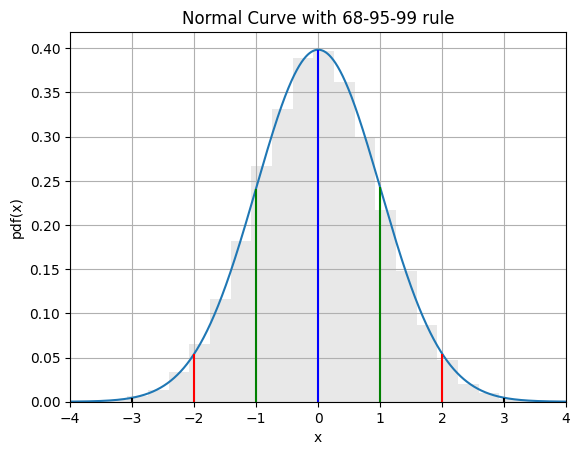

In [ ]:
# the normal curve
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

X = stats.norm.rvs(size=100000)
X.sort()

parameters = stats.norm.fit(X)
mu, sigma = parameters

fig, ax = plt.subplots()
ax.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
ax.hist(X, bins=25, density=True, color='lightgray', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_xlim(-4, 4)
ax.grid(True)

plt.vlines(x=-3, ymin=0, ymax=stats.norm.pdf(-3, loc=mu, scale=sigma), color='black')
plt.vlines(x=-2, ymin=0, ymax=stats.norm.pdf(-2, loc=mu, scale=sigma), color='red')
plt.vlines(x=-1, ymin=0, ymax=stats.norm.pdf(-1, loc=mu, scale=sigma), color='green')
plt.vlines(x=0, ymin=0, ymax=stats.norm.pdf(0, loc=mu, scale=sigma), color='blue')
plt.vlines(x=1, ymin=0, ymax=stats.norm.pdf(1, loc=mu, scale=sigma), color='green')
plt.vlines(x=2, ymin=0, ymax=stats.norm.pdf(2, loc=mu, scale=sigma), color='red')
plt.vlines(x=3, ymin=0, ymax=stats.norm.pdf(3, loc=mu, scale=sigma), color='black')
# plt.axvline(np.percentile(X, 2.5), color='black')
# plt.axvline(np.percentile(X, 97.5), color='black')

plt.title('Normal Curve with 68-95-99 rule')
plt.show()

## Hypothesis Testing

### The Null Hypothesis

In scientific research, the null hypothesis (often denoted H0)[1] is the claim that the effect being studied does not exist. Note that the term "effect" here is not meant to imply a causative relationship.

The null hypothesis can also be described as the hypothesis in which no relationship exists between two sets of data or variables being analyzed. If the null hypothesis is true, any experimentally observed effect is due to chance alone, hence the term "null". In contrast with the null hypothesis, an alternative hypothesis is developed, which claims that a relationship does exist between two variables.

https://en.wikipedia.org/wiki/Null_hypothesis

https://medium.com/peter-flom-the-blog/should-you-even-do-a-hypothesis-test-c21607d31c4b

This passage describes the core concepts of **hypothesis testing**, a fundamental method in statistics developed in the 1920s. Here's a summary:

**What is Hypothesis Testing?**

Hypothesis testing is a way to make inferences about a population based on sample data. It involves formulating two competing hypotheses:

* **Null Hypothesis (H0):** A statement of "no effect" or "no difference." It represents the status quo.
* **Alternative Hypothesis (H1):**  A statement that contradicts the null hypothesis, suggesting an effect or difference.

**The Process:**

1. **Formulate Hypotheses:** Clearly define the null and alternative hypotheses.
2. **Collect Data:** Gather data through experiments or observations.
3. **Analyze Data:** Calculate a test statistic that measures the difference between the sample data and what's expected under the null hypothesis.
4. **Calculate p-value:** The p-value is the probability of observing results as extreme as those obtained, assuming the null hypothesis is true.
5. **Make a Decision:**
   * If the p-value is below a predetermined significance level (often 0.05), we reject the null hypothesis in favor of the alternative hypothesis.
   * If the p-value is above the significance level, we fail to reject the null hypothesis.

**Key Points from the Passage:**

* **Hypotheses are Provisional:** Hypotheses are not absolute truths but working assumptions that can be tested.
* **The Null Hypothesis is Negative:** It denies change or effects. We aim to disprove it, not prove it.
* **P-value:**  A measure of evidence against the null hypothesis. Smaller p-values indicate stronger evidence.
* **Statistical Significance:** When the p-value is below the significance level, we say the results are statistically significant, suggesting that the observed effect is unlikely due to chance alone.

**Types of Tests:**

* **One-tailed test:**  Used when the alternative hypothesis specifies a direction of effect (e.g., greater than, less than).
* **Two-tailed test:** Used when the alternative hypothesis simply states a difference without specifying a direction.

**In essence, hypothesis testing provides a framework for using data to make decisions about whether to reject or fail to reject a claim about a population.**

### The Alternative Hypothesis

The alternative hypothesis and null hypothesis are types of conjectures used in statistical tests, which are formal methods of reaching conclusions or making judgments on the basis of data. In statistical hypothesis testing, the null hypothesis and alternative hypothesis are two mutually exclusive statements.

"The statement being tested in a test of statistical significance is called the null hypothesis. The test of significance is designed to assess the strength of the evidence against the null hypothesis. Usually, the null hypothesis is a statement of 'no effect' or 'no difference'." Null hypothesis is often denoted as H0.

The statement that is being tested against the null hypothesis is the alternative hypothesis. Alternative hypothesis is often denoted as Ha or H1.

In statistical hypothesis testing, to prove the alternative hypothesis is true, it should be shown that the data is contradictory to the null hypothesis. Namely, there is sufficient evidence against null hypothesis to demonstrate that the alternative hypothesis is true.

https://en.wikipedia.org/wiki/Alternative_hypothesis

This passage delves into the **Neyman-Pearson approach to hypothesis testing**, contrasting it with Fisher's ideas and highlighting the ongoing debate between these two frameworks.

**Neyman-Pearson vs. Fisher**

While Fisher focused on the p-value as a measure of evidence against the null hypothesis, Neyman and Pearson introduced a decision-making framework with a focus on error rates and power.

**Key Concepts in Neyman-Pearson:**

* **Alternative Hypothesis:**  Explicitly considered as a competing explanation for the data.
* **Decision Making:**  The goal is to decide between rejecting the null hypothesis in favor of the alternative or failing to reject the null.
* **Type I Error (False Positive):**  Rejecting the null hypothesis when it's actually true.
* **Type II Error (False Negative):** Failing to reject the null hypothesis when the alternative is true.
* **Size of the Test (Alpha):**  The probability of making a Type I error, typically pre-specified (e.g., 0.05).
* **Power of the Test (Beta):** The probability of correctly rejecting the null hypothesis when the alternative is true.

**The Trade-off:**

Neyman and Pearson emphasized the importance of balancing Type I and Type II errors.  Increasing power (reducing Type II errors) often comes at the cost of increasing the risk of Type I errors.

**The Argument:**

Fisher and Neyman-Pearson disagreed on the philosophical underpinnings and practical application of hypothesis testing. Fisher criticized the Neyman-Pearson approach for its focus on decision-making rather than evidence, while Neyman-Pearson argued that Fisher's p-value approach lacked a formal decision rule.

**Resolution?**

Despite the historical debate, modern practice often combines elements of both approaches. Confidence intervals (influenced by Neyman-Pearson) are used alongside p-values (Fisher's contribution) to provide a more complete picture of the data.

**In essence, the Neyman-Pearson approach adds a layer of decision-making to hypothesis testing, considering error rates and power. This complements Fisher's p-value approach, and the combination of these perspectives provides a richer toolkit for statistical inference.**

### Type I and Type II Errors

- Hypothesis testing is used against results that are already known
- Type I error: Reject null hypothesis that should have been supported
- $H_0$: There is no fire. Pull the fire alarm, when there is no fire
- Type II error: Fail to reject a null hypothesis that should have been rejected
- $H_0$: There is no fire. Failed to pull the fire alarm, when there is a fire

https://economics.stackexchange.com/questions/27677/type-i-error-type-ii-error-pregnancy-test-analogy-is-it-legit

### Test of Means

Parametric tests (has assumptions about the distribution such as mean and standard deviation)
- z-test
- t-test
- ANOVA

Non-parametric tests (does not assume anything about the distribution)
- Chi-square
- Mann-Whitney U-test
- Kruskel-Wallis H-test

#### Paramatric Tests
Is the mean of sample 1 the same as the mean of sample 2?

Please review https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-tailed-test-or-two/

- For a one tailed null hypothesis we see $\leq$ or $\geq$
- For a one tailed alt hypothesis we see $<$ or $>$
- For a two tailed null hypothesis we see the symbol $=$
- For a two tailed alt hypothesis we see the symbol $\ne$

**For a One Tailed Test**
- Null Hypothesis – There is no significant difference between the means of groups
- Alternate Hypothesis – There is a significant difference between the means of groups in that the mean of the group is less or greater than some x

**For a Two Tailed Test**
- Null Hypothesis – There is no significant difference between the means of groups
- Alternate Hypothesis – There is a significant difference between the means of groups either greater than x or less than x

For example,

**For a One Tailed Test**
- a null hypothesis might be $\mu_1 \geq \mu_2$,
- and the alt hypothesis would be $\mu_1 < \mu_2$

**For a Two Tailed Test**
- a null hypothesis might be $\mu_1 = \mu_2$,
- and the alt hypothesis would be $\mu_1 \ne \mu_2$

Remember, we never accept the null hypothesis, we either reject it or fail to reject it.

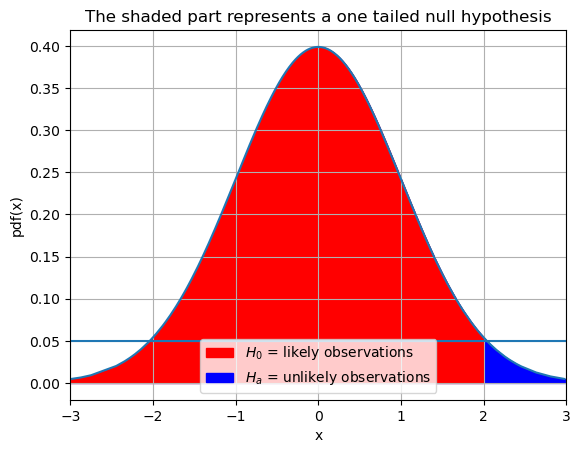

In [ ]:
# example of one tailed hypothesis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as stats

X = stats.norm.rvs(size=1000)
X.sort()
fig, ax = plt.subplots()

ax.plot(X, stats.norm.pdf(X, loc=0, scale=1))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-3, 2, 0.01)
ax.set_xlim(-3, 3)
full_range = np.arange(-3, 3, 0.01)
ax.fill_between(full_range, stats.norm.pdf(full_range,loc=0,scale=1), color='b')
ax.fill_between(px,stats.norm.pdf(px, loc=0, scale=1), color='r')
plt.title('The shaded part represents a one tailed null hypothesis')
red_patch = mpatches.Patch(color='red', label=f'$H_0$ = likely observations')
blue_patch = mpatches.Patch(color='blue', label=f'$H_a$ = unlikely observations')
plt.axhline(y=0.05)
plt.legend(handles=[red_patch, blue_patch])
plt.show()

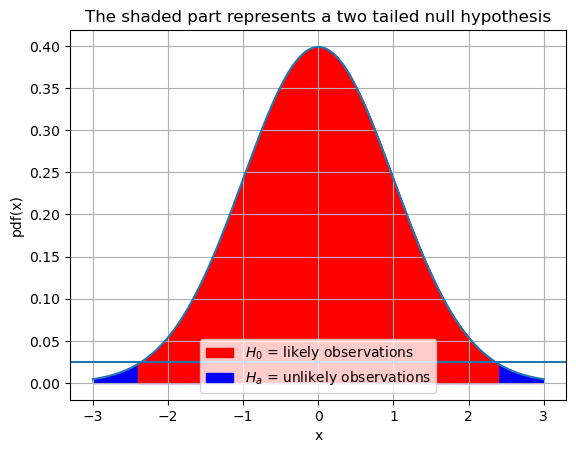

In [ ]:
# example of two tailed hypothesis
x = np.linspace(-3, 3, 1000)

fig, ax = plt.subplots()
ax.plot(x, stats.norm.pdf(x,loc=0,scale=1))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
stds = 2.4 # how many standard deviations from the mean
full_range = np.arange(-3, 3, 0.01)
ax.fill_between(full_range, stats.norm.pdf(full_range,loc=0,scale=1), color='b')
px=np.arange(-stds,stds,0.01)
ax.fill_between(px,stats.norm.pdf(px,loc=0,scale=1), color='r')
plt.title('The shaded part represents a two tailed null hypothesis')
red_patch = mpatches.Patch(color='red', label=f'$H_0$ = likely observations')
blue_patch = mpatches.Patch(color='blue', label=f'$H_a$ = unlikely observations')
plt.axhline(y=0.025)
plt.legend(handles=[red_patch, blue_patch])
plt.show()

In [ ]:
# z value for confidence intervals
import numpy as np
from scipy import stats

a = 0.05 # a = 1 - 95%
print(f'z for 95%: {np.round(np.abs(stats.norm.ppf(a/2)), 3)}')

z for 95%: 1.96


https://www.mathsisfun.com/data/confidence-interval.html

There are hundreds of apples on the trees, so you randomly choose just 46 apples and get:

* a Mean of 86
* a Standard Deviation of 6.2

In [ ]:
a = 0.05
z = np.round(np.abs(stats.norm.ppf(a/2)), 3)
mu = 86
s = 6.2
n = 46
print(mu, s, n)

ci = [mu - z * (s / np.sqrt(n)), mu + z * (s / np.sqrt(n))]
print(ci)

86 6.2 46
[84.20828534880569, 87.79171465119431]


### Level of Significance

Level of Significance or $\alpha$ = 1 - confidence interval

A study's defined significance level, denoted by alpha, is the probability of the study rejecting the null hypothesis, given that the null hypothesis is true; and the p-value of a result, p, is the probability of obtaining a result at least as extreme, given that the null hypothesis is true. The result is statistically significant, by the standards of the study, when p is less than or equal to alpha. The significance level for a study is chosen before data collection, and is typically set to 5% or much lower—depending on the field of study. In any experiment or observation that involves drawing a sample from a population, there is always the possibility that an observed effect would have occurred due to sampling error alone. But if the p-value of an observed effect is less than (or equal to) the significance level, an investigator may conclude that the effect reflects the characteristics of the whole population, thereby rejecting the null hypothesis.

https://en.wikipedia.org/wiki/Statistical_significance

Given $\alpha = 0.05$:
- Extreme values occur in one tail of a one tail test = 5%
- Extreme values occur on both tails of a two tail test = 2.5% for each tail

These areas establish our critical values or z-scores
- For one tailed test $z = 1.645$
- For two tailed test $ z = \pm 1.960$

### Experimental Design

**Hypothesis Testing: Another View**

**1. Start with a Testable Question**

In hypothesis testing, we begin with an idea or question that can be framed as a statement ("hypothesis") that could be proven wrong.  This statement should be about something we can actually collect data on.

**2.  The Null Hypothesis: Assume Nothing Interesting is Happening**

We set up a "null hypothesis" (H0), which essentially says "there's no effect" or "no difference." It's like assuming the boring answer is true until we have evidence to the contrary.

**3. Choose a Test Statistic:  A Measure of "Interestingness"**

We pick a test statistic that helps us measure whether our data is consistent with the null hypothesis. This statistic should be something that, if it takes on an extreme value, would make us doubt the null hypothesis.

**4.  Simulate the "Null World"**

We imagine a world where the null hypothesis is true.  We use our knowledge of statistics to figure out what kind of values our test statistic would take on in this "null world." This creates a "sampling distribution" of the test statistic.

**5.  Compare Our Data to the "Null World"**

We look at where our actual test statistic (calculated from our data) falls on this simulated "null world" distribution.

* **p-value: How weird is our data?**  The p-value tells us how likely it would be to get a test statistic as extreme as ours (or even more extreme) if the null hypothesis were actually true.

**6.  Define "Extreme"**

We need to decide what counts as "extreme." This depends on our research question and whether we're interested in deviations in one direction (one-tailed test) or both directions (two-tailed test).

**7.  Make a Decision:  Significant or Not?**

* **Statistically significant:**  If the p-value is very small (typically below 0.05 or 0.01), we say the result is statistically significant. This means our data is unusual enough that we reject the null hypothesis.  
* **Not significant:** If the p-value is larger, we don't have enough evidence to reject the null hypothesis.

**Key Points:**

* We're trying to *disprove* the null hypothesis, not prove it.
* The p-value helps us decide how strong the evidence is against the null hypothesis.
* 0.05 and 0.01 are common thresholds for statistical significance, but the specific threshold depends on the context of the research.


This rephrased explanation aims to provide a more intuitive and less technical understanding of the hypothesis testing process.

### P-value

* The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

Stephanie Glen. "P-Value in Statistical Hypothesis Tests: What is it?" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/

* The probability of getting a result at least as extreme as the tail area of concern, if the null hypothesis is true; a tail test

### Relationship Between Standard Errors, Confidence Intervals, and the P-values

**Understanding Confidence Intervals and Their Role in Hypothesis Testing**

**Confidence Intervals: A Range of Plausible Values**

Think of a confidence interval as a "best guess" range for a population value. It's centered around your sample estimate, and its width is determined by the variability in your data.  A common rule of thumb is that the interval extends roughly 2 standard errors above and below your estimate.

**Standard Deviation vs. Standard Error: Measuring Different Types of Variability**

* **Standard Deviation:** Measures how spread out the individual data points are within your sample.
* **Standard Error:**  Estimates how much your sample estimate (e.g., the sample mean) would vary if you took many different samples from the same population.

**Using Confidence Intervals in Hypothesis Testing**

Confidence intervals can help you make decisions in hypothesis testing:

* **Does the interval include the null hypothesis value?** If your null hypothesis is about "no effect" (often represented by a value of 0), and your confidence interval includes 0, then your data is consistent with the null hypothesis. You would likely fail to reject the null hypothesis.

* **How does the confidence interval relate to the p-value?**  If the p-value is very small (indicating strong evidence against the null hypothesis), the confidence interval will typically not include the null hypothesis value.

**In Summary**

Confidence intervals provide a range of plausible values for a population parameter. By examining whether the interval includes the null hypothesis value and considering the p-value, you can gain a clearer understanding of your data and make more informed decisions in hypothesis testing.

## Test of Means

**Hypothesis Testing: The Big Umbrella**

Hypothesis testing is a general framework for using data to make decisions about populations. It involves formulating hypotheses, collecting data, calculating test statistics, and making decisions based on p-values.

**Test of Means: A Specific Type of Hypothesis Test**

A "test of means" falls under the umbrella of hypothesis testing. It refers to a specific category of tests where the primary goal is to compare the means of different groups.  

**Examples of Tests of Means:**

* **One-sample t-test:**  Compares the mean of a single sample to a known population mean (like in the chip bag and die roll examples).
* **Independent samples t-test:** Compares the means of two independent groups (e.g., comparing the average test scores of students who received different teaching methods).
* **Paired samples t-test:**  Compares the means of two related groups (e.g., comparing the average blood pressure of patients before and after taking a medication).
* **ANOVA (Analysis of Variance):** Compares the means of three or more groups.

**T-tests: A Tool for Tests of Means**

T-tests are a common statistical tool used to conduct tests of means. They are particularly useful when dealing with small sample sizes and when the population standard deviation is unknown.

**In Summary**

* **Hypothesis testing** is the overall framework.
* **Test of means** is a specific type of hypothesis test focused on comparing means.
* **T-tests** are a statistical tool often used to perform tests of means.

### The Student's t-Statistic

* Developed by William Gosset in 1908 while working at the Guiness brewery
* Used to determine how far the estimate is from 0 (the mean) in respect to standard errors
* The standard deviation reflects variability within a sample, while the standard error estimates the variability across samples of a population https://www.scribbr.com/statistics/standard-error/
* Standard error of the mean (SEM) measures how far the sample mean (average) of the data is likely to be from the true population mean. The SEM is always smaller than the SD. https://www.investopedia.com/ask/answers/042415/what-difference-between-standard-error-means-and-standard-deviation.asp
* The standard deviation of sample means, is called the standard error. The standard error tells you how accurate the mean of any given sample from that population is likely to be compared to the true population mean. When the standard error increases, i.e. the means are more spread out, it becomes more likely that any given mean is an inaccurate representation of the true population mean. https://s4be.cochrane.org/blog/2018/09/26/a-beginners-guide-to-standard-deviation-and-standard-error/
* Given a t-value and the sample size, software can provide a precise p-value
* For large samples, t-values +- 2 standard errors corresponds to p-value < 0.05

### t-Test

- When we use z scores with a normal distribution, we have to know the population's standard deviation
- Student's T-Distribution developed by William Sealy Gossett while working at Guinness Brewery but couldn't use his name
- Student's t-test determines if there is a significant difference between two sets of data
- Can't just compare means due to variance and outliers
- t-test also considers sample variances


### One Sample t Test

- We don't know the population standard deviation
- Tests null hypothesis that population mean is equal to a specified $\mu$ based on a sample mean $\bar{x}$
- $H_0$: Sample mean = Population mean

t-statistic:
- $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$
- s = sample standard error

In [ ]:
# one sample t test
from scipy import stats

rvs = stats.norm.rvs(loc = 0, scale = 1, size=(100, 2))
print(stats.ttest_1samp(rvs, 5.0))

Ttest_1sampResult(statistic=array([-54.54613851, -48.9100218 ]), pvalue=array([1.12363402e-75, 3.74502352e-71]))


### Tests of Means vs Tests of Proportion

Test of means (comparing means of groups):
- $z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$
- z assumes we know the population standard deviation
- t is used when we don't know the population standard deviation
- $t = \frac{\bar{x1} - \bar{x2}}{s/\sqrt{n}}$

Test of proportions (saying like 75%, or most, of the time):
- $z = \frac{\hat{p} - p}{\sqrt{\frac{p (1 - p)}{n}}}$

### Test Statistics

- z-tests uses the z statistic as the test statistic
- t-tests uses the t statistic as the test statistic
- ANOVA uses the f statistic as the test statistic

### Example
- Set the level of significance
- Calculate the critical value
- Compare test statistic to the critical value

In [ ]:
# one tail vs two tail
from scipy import stats

a = 0.05
print(f'One-tailed test: {np.round(np.abs(stats.norm.ppf(a)), 3)}')
print(f'Two-tailed test: {np.round(np.abs(stats.norm.ppf(a/2)), 3)}')

One-tailed test: 1.645
Two-tailed test: 1.96


### Independent Two-Sample t-Test

- $H_0$: $\bar{x_1} = \bar{x_2}$
- Are two samples from the class equal?

t-statistic can have:
- equal sample sizes, equal variance
- unequal sample sizes, equal variance
- equal of unequal sample sizes, unequal variance (Welch's t-test)

t = signal/noise = difference in means/sample variability = $\frac{(\bar{x_1} - \bar{x_2})}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

Compared to a t-score:
- $t$ = t-statistic
- $t_{df, \alpha}$ = t-critical
- df = degrees of freedom
- General formula for df = n1 + n2 - 2 for equal variance or
- Also see Welch-Satterthwaite Formula
- $\alpha$ = significance level

In [ ]:
# independent t test
from scipy import stats

rvs1 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
rvs2 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
print(stats.ttest_ind(rvs1,rvs2)) # assumes that the populations have identical variances by default

Ttest_indResult(statistic=0.6185546455193291, pvalue=0.5363509342125048)


### t-Test Example

There are two classes of 10 students each with their course total points
- $H_0: \mu_1 \leq \mu_2$
- $H_a: \mu_1 \gt \mu_2$
- Find the mean
- Find the variance
- Compute the t-value: $\frac{(\bar{x_1} - \bar{x_2})}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$


In [ ]:
import numpy as np

# class1 = [random.randint(90, 100) for i in range(10)]
# class2 = [random.randint(83, 93) for i in range(10)]

class1 = [1184, 1203, 1219, 1238, 1243, 1204, 1269, 1256, 1156, 1248]
class2 = [1136, 1178, 1212, 1193, 1226, 1154, 1230, 1222, 1161, 1148]
print('Is the difference in means statistically different?', np.mean(class1) - np.mean(class2))

print(stats.ttest_ind(class1, class2))

Is the difference in means statistically different? 36.0
Ttest_indResult(statistic=2.2795770510504845, pvalue=0.03504505626727664)


The two means are statistically different

What about a two tailed test?

In [ ]:
print('Statistic:', stats.ttest_ind(class1, class2).statistic)
print('pValue:', stats.ttest_ind(class1, class2).pvalue/2)

Statistic: 2.2795770510504845
pValue: 0.01752252813363832


### Dependent Paired-Sample t-Test

- Used when the 2 samples are dependent
- Repeated measures
- Means of before and after learning

### The P Value Test

For a p value test:
- Get the test statistic
- Use it to determine the p-value
- Compare the p-value to the level of significance
- If the p-value is low the null must go! Reject $H_0$
- If the p-value is high the null must fly! Fail to reject $H_0$

Stephanie Glen. "P-Value in Statistical Hypothesis Tests: What is it?" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/

The lower the p value, the more predictive the feature is in principle. When we run tests, we are often concerned with the alpha level to help us reject or fail to reject the null hypothesis. The alpha level is (1 - our confidence interval), so if we wanted to have a confidence level of 95% we would use a alpha value of 5%. If our p value is less than the alpha value then the evidence points to rejecting the null hypothesis. If our p values is less than the alpha value then we can say our results are statistcally significant. We found something that is probably not the result of chance. But beware.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Empirical_rule_histogram.svg/675px-Empirical_rule_histogram.svg.png' alt='normal curve' />

In [ ]:
# one tail vs two tail
import numpy as np
from scipy import stats

a = 0.05
print(f'One-tailed test: {np.round(np.abs(stats.norm.ppf(a)), 3)}')
print(f'Two-tailed test: {np.round(np.abs(stats.norm.ppf(a/2)), 3)}')

One-tailed test: 1.645
Two-tailed test: 1.96


In [ ]:
# find p value given z left tail
import scipy.stats as stats

print('z=-1.65: ', stats.norm.cdf(-1.65))
print('z=-1.64: ', stats.norm.cdf(-1.64))

stats.norm.sf(abs(-1.64))

z=-1.65:  0.0494714680336481
z=-1.64:  0.05050258347410371


0.05050258347410371

In [ ]:
# find p value given z two tail
stats.norm.sf(abs(2))*2

0.04550026389635839

### Pizza Example

Pizza delivery takes, on average, 31 minutes with a standard deviation of 7 minutes. We want faster delivery times so we provide bonuses to drivers that deliver under 30 minutes. We take a sample of size 40 of these new deliveries and find that the mean of the sample = 28. We want the confidence level to be 95%.

- State the null hypothesis: $H_0: \mu \geq 31$
- State the alternative hypothesis: $H_a: \mu \lt 31$
- Determine test type (left tail, right tail, two tail)
- Since we want an improved outcome this will be one tailed left
- $z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$

In [ ]:
# find test statistic from our formula
import numpy as np

test_statistic = (28 - 31) / (7/np.sqrt(40))
np.round(test_statistic, 3)

-2.711

In [ ]:
# find critical value
from scipy import stats

critical_value = stats.norm.ppf(0.05)
np.round(critical_value, 3)

-1.645

Since -2.711 < -1.645 we reject the null hypothesis.

In [ ]:
# p-value approach
import scipy.stats as stats

np.round(stats.norm.sf(abs(test_statistic)), 3)

0.003

0.003 < 0.05

### P-Value Problems

**The Problem with Misinterpreting p-values**

Imagine a study with 1,000 participants where the null hypothesis is actually false (there's a real effect). Even with a proper study design, we might incorrectly conclude there's no effect about 10% of the time. This is a "false negative."

On the other hand, sometimes we might see a statistically significant result (p-value less than 0.05) even when there's no real effect. This is a "false positive," and it can happen more often than you might think (in this example, 36% of the time).

**The p-value Misconception**

The problem is that p-values are often misunderstood.  People mistakenly believe that:

* A small p-value means the null hypothesis is definitely false.
* A large p-value means the null hypothesis is definitely true.

These misinterpretations have led to a "flood" of misleading scientific studies, where conclusions are based solely on whether a p-value crosses a specific threshold (like 0.05).

**The Importance of Context and Transparency**

Experts like John Ioannidis have warned that many published research findings might be false due to overreliance on p-values and other statistical issues.

To address this, the American Statistical Association has provided guidelines for using p-values responsibly. They emphasize that:

* **p-values are not the whole story:**  They should be considered alongside other evidence, like the study design, effect size, and the plausibility of the hypothesis.
* **Transparency is key:** Researchers should fully report their methods and results, not just whether the p-value was "significant."
* **Effect size matters:**  A small p-value doesn't necessarily mean a big or important effect.

**In essence, p-values are a useful tool, but they can be misleading if misinterpreted.  Sound scientific conclusions require a holistic approach that considers multiple factors, not just whether a p-value crosses a magic threshold.**

### More P-Value Problems

**The Problem of Multiple Comparisons: Why More Tests Can Lead to More Mistakes**

Imagine testing a new drug that actually has no effect (the null hypothesis is true).  Even though the drug doesn't work, there's always a chance we'll see a "statistically significant" result in a clinical trial just by random luck. This is a false positive.

* **One trial:** If we run one trial, there's a 5% chance of getting a false positive (if we use the typical p-value threshold of 0.05).
* **Multiple trials:**  But what if we run multiple trials?  The more trials we run, the higher the chance of getting at least one false positive just by chance.
    * Two trials: The chance increases to about 10%.
    * Ten trials: The chance jumps to 50%!

This is the problem of **multiple comparisons**. When we conduct many tests and only focus on the most significant result, we inflate the risk of finding a false positive. It's like flipping a coin many times—eventually, you're bound to get a long streak of heads, even though the coin is fair.

**How to Avoid the Trap**

* **Be aware of the issue:** Recognize that the more tests you run, the higher the chance of false positives.
* **Adjust for multiple comparisons:** There are statistical methods (like ANOVA, mentioned in the passage) that adjust p-values to account for multiple comparisons, reducing the risk of false positives.
* **Focus on the whole picture:** Don't just cherry-pick the most significant result. Consider all the evidence, including the effect sizes and the plausibility of the findings.

**In essence, multiple comparisons can lead to misleading conclusions if not handled properly. By being aware of the issue and using appropriate statistical techniques, we can reduce the risk of false positives and make more reliable inferences from our data.**

## Analysis of Variance (ANOVA)

### One Way ANOVA

- https://www.statology.org/one-way-anova/
- https://www.itl.nist.gov/div898/handbook/ppc/section2/ppc231.htm
- https://en.wikipedia.org/wiki/One-way_analysis_of_variance

**Hypothesis**:
- $H_0:; \mu_1 = \mu_2 = \mu_3$
- We could test each pair
    * $H_0: \mu_1 = \mu_2, \alpha = 0.05$
    * $H_0: \mu_1 = \mu_3, \alpha = 0.05$
    * $H_0: \mu_2 = \mu_3, \alpha = 0.05$
- Overall confidence drops: .95 x .95 x .95 = .857
- ANOVA works by computing an F value and compares it to a critical value determined by our degrees of freedom which is determined by the number of groups and number of items in each group
- Considers two types of variance:
    * Between Groups: group mean varies from total mean
    * Within Groups: individual mean varies from group mean
- The F value is the ratio between these two variances

$
F = \frac{Variance Between Groups}{Variance Within Groups} = \frac{\frac{SSG}{df_{groups}}}{\frac{SSE}{df_{error}}} = \frac{\frac{SSG}{ngroups-1}}{\frac{SSE}{(n_{rows}-1)*n_{groups}}}
$

Variance revisited:
- $\frac{SS}{df} = \frac{\sum(x - \bar{x})^2}{n - 1}$

### Degrees of Freedom

https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/


### Assumptions of ANOVA
- Errors are normally distributed
- Homoscedasticity or Homogeneity of variances
- Independent samples
- Continuous dependent variable

### F Distribution Used in Analysis of Variance (ANOVA)

- z and t answers the question 'What is the probability that two samples come from the same population?'
- What is the probability that two samples come from populations that have the same variance?
- What is the probability that three or more samples come from the same population?
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html
- http://pytolearn.csd.auth.gr/d1-hyptest/11/f-distro.html

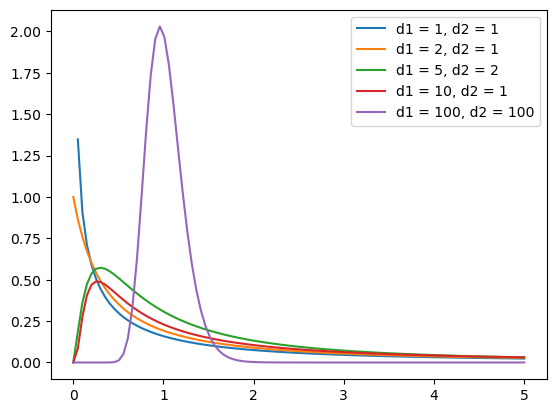

In [ ]:
# plotting f distribution pdf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

x = np.linspace(0, 5, 100)
y1 = f.pdf(x, 1, 1)
plt.plot(x, y1, label=f'd1 = 1, d2 = 1')
y2 = f.pdf(x, 2, 1)
plt.plot(x, y2, label=f'd1 = 2, d2 = 1')
y3 = f.pdf(x, 5, 2)
plt.plot(x, y3, label=f'd1 = 5, d2 = 2')
y4 = f.pdf(x, 10, 1)
plt.plot(x, y4, label=f'd1 = 10, d2 = 1')
y5 = f.pdf(x, 100, 100)
plt.plot(x, y5, label=f'd1 = 100, d2 = 100')

plt.legend();

   Group1  Group2  Group3
0      37      62      50
1      60      27      63
2      52      69      58
3      43      64      54
4      40      43      49
5      52      54      52
6      55      44      53
7      39      31      43
8      39      49      65
9      23      57      43
SSG = 420.000, SSE = 3300.000
df_groups = 2, df_errors = 27
F statistic: 1.718
Critical value (alpha=0.05): 3.354
scipy f_oneway -> F=1.718182, p=0.198431


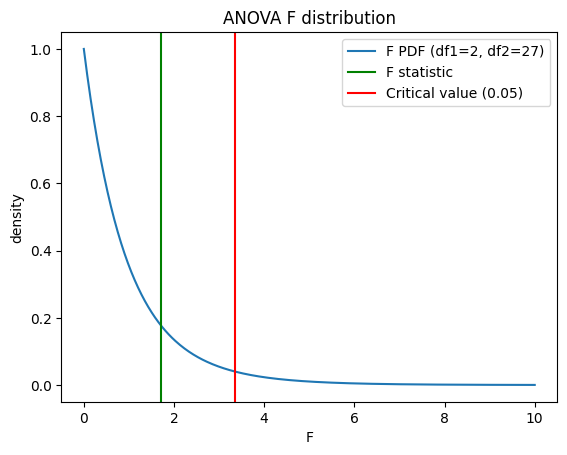

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data
data = {
    'Group1': [37, 60, 52, 43, 40, 52, 55, 39, 39, 23],
    'Group2': [62, 27, 69, 64, 43, 54, 44, 31, 49, 57],
    'Group3': [50, 63, 58, 54, 49, 52, 53, 43, 65, 43]
}
anova_df = pd.DataFrame(data)
print(anova_df.head(10))

# Basic counts
n = anova_df.shape[0]          # observations per group
k = anova_df.shape[1]          # number of groups
N = n * k

# Means
group_means = anova_df.mean()
grand_mean = anova_df.to_numpy().mean()   # safer than mean-of-means

# Sum of Squares Between (groups)
SSG = n * ((group_means - grand_mean) ** 2).sum()

# Sum of Squares Within (error)
SSE = ((anova_df - group_means) ** 2).to_numpy().sum()

# Degrees of freedom
df_groups = k - 1
df_errors = N - k

# F statistic
MS_between = SSG / df_groups
MS_within  = SSE / df_errors
f_stat = MS_between / MS_within
print(f"SSG = {SSG:.3f}, SSE = {SSE:.3f}")
print(f"df_groups = {df_groups}, df_errors = {df_errors}")
print("F statistic:", np.round(f_stat, 3))

# Critical value for alpha
alpha = 0.05
cv = stats.f.ppf(1 - alpha, dfn=df_groups, dfd=df_errors)
print("Critical value (alpha=0.05):", np.round(cv, 3))

# Optional: verify with scipy
res = stats.f_oneway(anova_df['Group1'], anova_df['Group2'], anova_df['Group3'])
print(f"scipy f_oneway -> F={res.statistic:.6f}, p={res.pvalue:.6f}")

# Visualize F distribution
x = np.linspace(0, 10, 400)
y = stats.f.pdf(x, df_groups, df_errors)
plt.plot(x, y, label=f'F PDF (df1={df_groups}, df2={df_errors})')
plt.axvline(x=f_stat, color='g', label='F statistic')
plt.axvline(x=cv, color='r', label='Critical value (0.05)')
plt.xlabel('F')
plt.ylabel('density')
plt.title('ANOVA F distribution')
plt.legend()
plt.show()

Since f is lest than $f_{critical}$, or 1.718 < 3.354, we fail to reject the hypothesis. We don't have enough evidence to show there are differences between the groups.

### Two Way ANOVA

- Tests two independent variables at the same time
- Rows are organized as blocks
- Goal is to isolate and remove any variance contributed by the blocks, to better understand the variance in the groups


SSG=6.0000, SSB=9.0000, SSE=1.0000, SST=16.0000
df_groups=1, df_blocks=2, df_error=2
F (groups) = 12.0000, critical value = 18.5128
F (blocks) = 9.0000, critical value (blocks) = 19.0000


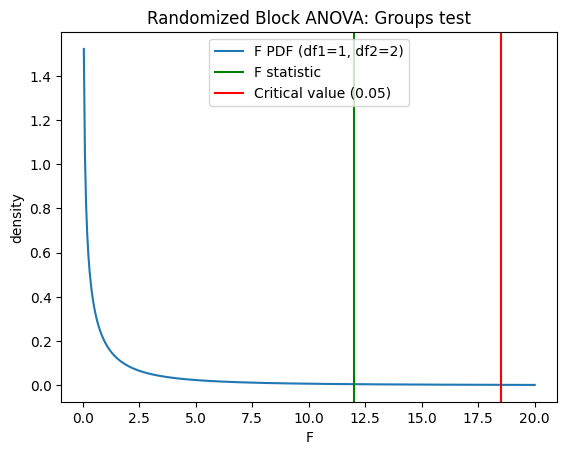

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Data
two_way_df = pd.DataFrame(
    {'Block': ['Block1', 'Block2', 'Block3'],
     'Group1': [8, 10, 12],
     'Group2': [11, 12, 13]}
).set_index('Block')

# Sizes
b = two_way_df.shape[0]           # number of blocks
a = two_way_df.shape[1]           # number of groups (treatments)

# Means
group_means = two_way_df.mean(axis=0)     # per-column means
block_means = two_way_df.mean(axis=1)     # per-row means
grand_mean  = two_way_df.to_numpy().mean()

# Sums of squares (randomized block design / two-way without interaction)
SSG = b * ((group_means - grand_mean) ** 2).sum()        # between groups
SSB = a * ((block_means - grand_mean) ** 2).sum()        # between blocks
SST = ((two_way_df - grand_mean) ** 2).to_numpy().sum()  # total
SSE = SST - SSG - SSB                                    # error

# Degrees of freedom
df_groups = a - 1
df_blocks = b - 1
df_error  = (a - 1) * (b - 1)

# F tests
MS_groups = SSG / df_groups
MS_error  = SSE / df_error
F_groups  = MS_groups / MS_error

alpha = 0.05
cv = stats.f.ppf(1 - alpha, dfn=df_groups, dfd=df_error)

print(f"SSG={SSG:.4f}, SSB={SSB:.4f}, SSE={SSE:.4f}, SST={SST:.4f}")
print(f"df_groups={df_groups}, df_blocks={df_blocks}, df_error={df_error}")
print(f"F (groups) = {F_groups:.4f}, critical value = {cv:.4f}")

# Optional: block effect F
MS_blocks = SSB / df_blocks
F_blocks  = MS_blocks / MS_error
cv_blocks = stats.f.ppf(1 - alpha, dfn=df_blocks, dfd=df_error)
print(f"F (blocks) = {F_blocks:.4f}, critical value (blocks) = {cv_blocks:.4f}")

# Visualize F distribution for the groups test
x = np.linspace(0, 20, 400)
y = stats.f.pdf(x, df_groups, df_error)  # order is (dfn, dfd)
plt.plot(x, y, label=f'F PDF (df1={df_groups}, df2={df_error})')
plt.axvline(F_groups, color='g', label='F statistic')
plt.axvline(cv, color='r', label='Critical value (0.05)')
plt.xlabel('F')
plt.ylabel('density')
plt.title('Randomized Block ANOVA: Groups test')
plt.legend()
plt.show()

### More ANOVA

- Two-Way ANOVA with replication
- ANCOVA
- MANOVA
- MANCOVA

http://www.statsmakemecry.com/smmctheblog/stats-soup-anova-ancova-manova-mancova

## Chi Square

### Chi Square Distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

Degrees of Freedom:<br />
https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/

* Right skewed
* Approaches normal the larger the df

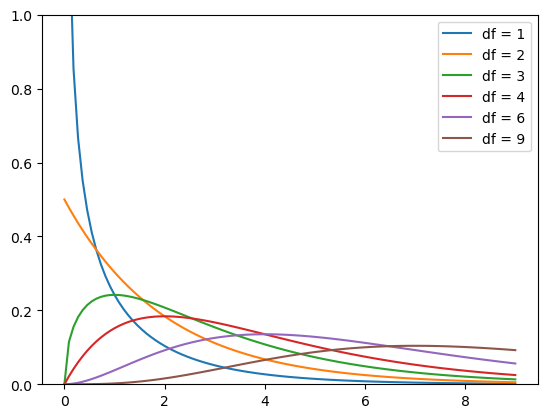

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

x = np.linspace(0, 9, 100)
plt.plot(x, chi2(1).pdf(x), label=f'df = 1')
plt.plot(x, chi2(2).pdf(x), label=f'df = 2')
plt.plot(x, chi2(3).pdf(x), label=f'df = 3')
plt.plot(x, chi2(4).pdf(x), label=f'df = 4')
plt.plot(x, chi2(6).pdf(x), label=f'df = 6')
plt.plot(x, chi2(9).pdf(x), label=f'df = 9')
plt.ylim(0, 1)

plt.legend();

### Chi-Square Test ($\chi^2$)

- Goodness of fit
- How much does the observed results vary from the expected results
- Probability of an observed event given what is expected
- If we roll a die 24 times and 6 comes up 10 times, is this chance or the die is loaded?
- Chi-square squares the distances between the observed value and the expected value divided by the expected value
- $\chi^2 = \sum\frac{(O - E)^2}{E}$

Example:
- We flip a coin 18 times and heads comes up 12 times
- Expected value: 18 / 2 = 9
- $\chi^2 = \sum\frac{(O - E)^2}{E} = \frac{(12 - 9)^2}{9} + \frac{(6 - 9)^2}{9}$ = 2
- $\chi^2$ on the x axis and p-value on the y axis
- Low $\chi^2$ means a high correlation between observed and expected values
- $H_0$: 12 heads out of 18 flips is fair with 95% probability


Statistic value: 2.0, p-value: 0.15729920705028105
Critical value: 3.841458820694124


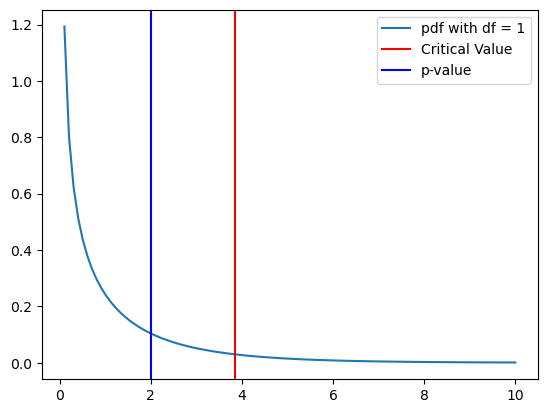

In [ ]:
# visualize with plot
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import chisquare

sv, pv = chisquare([12, 6], [18 * 0.5, 18 * 0.5]) # statistic value, p value
print(f'Statistic value: {sv}, p-value: {pv}')
cv = chi2.ppf(1-.05, df=1) # critical value
print(f'Critical value: {cv}')
x = np.linspace(0, 10, 100)
y = chi2(1).pdf(x)
plt.plot(x, y, label=f'pdf with df = 1')
plt.axvline(x=np.round(cv, 3), color='r', label=f'Critical Value')
plt.axvline(x=np.round(sv, 3), color='b', label='p-value')

plt.legend();